\tableofcontents  
\pagebreak  

# Scientific Computing in Python

Im letzten Teil haben wir die Grundlagen von Python kennengelernt. In diesem Teil wollen wir uns nun auf das Python Ökosystem, und im speziellen auf die Bibliotheken für Scientific Computing, fokussieren. Aber schauen wir zunächst erstmal, wie wir diese Bibliotheken einbinden, da sie standardmäßig nicht mit dem Python Interpreter ausgeliefert werden.

## Installieren von Modulen

Im Gegensatz zu Sprachen wie C++ ist es in Python ein leichtes, externe Pakete zu installieren. Hierzu stellt Python das Modul `pip` zur Verfügung, mit welchem sich externe Pakete verwalten lassen. Über den Befehl

`pip install Paketname`

kann dann ganz einfach das benötigte Paket installiert werden. NumPy (für Numerical Python) lässt sich also via `pip install numpy` installieren.

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


## Importieren von Modulen

Wenn ein Paket dann erfolgreich installiert wurde, muss es noch importiert werden. Per stillschweigender Konvention geschieht das immer direkt am Anfang eines jeden Programms. Wenn externe Pakete verwendet ist Vorsicht bei der Namensgebung von Variablen geboten. Auch hier gilt via stillschweigender Konvention, dass externe Pakete Vorrang vor selbstdefinierten Variablen haben. Um nun ein Paket in den Namespace des Programms zu importieren wird der Befehl 

`import Paketname`

verwendet. Um beim Beispiel NumPy zu bleiben lautet der Befehl dann `import numpy`.

In [2]:
import numpy

## Alias von Modulen

Wird nur der blanke `import Paketname` Befehl verwendet, kann das Paket nur durch Angabe des vollständigen Namens genutzt werden.

In [3]:
numpy.ones(3)

array([1., 1., 1.])

Möchte man jedoch eine Abkürzung verwenden muss man noch das Schlüsselwort `as` nach dem Import, gefolgt von dem gewünschten Alias, setzen. Das Paket lässt sich dann sowohl über den vollständigen Namen als auch über den Alias aufrufen.

In [4]:
import numpy as np

np.ones(3)

array([1., 1., 1.])

## Untermodule importieren

Möchte man nur gewisse Untermodule importieren, oder lässt das Pakete es gar nicht anders zu, muss man dieses explizit importieren. Dazu wird nach dem eigentlichen Paketnamen ein Punkt `.` gesetzt und danach das Unterpaket genannt, welches man importieren möchte. Der Befehl lautet dann

` import Paketname.Unterpaket`

In [5]:
import scipy.fft

## Die wichtigsten Pakete

Die für uns wichtigsten Pakete in Python für Scientific Computing sind

- [NumPy](https://numpy.org/),
- [SciPy](https://scipy.org/) und
- [Matplotlib](https://matplotlib.org/).

Während die ersten beiden Pakete für Berechnungen verwendet stellt letzteres Features für die Visualisierung von Daten bereit.

## Import der Pakete

NumPy und Matplotlib werden überlichweise mit einem Alias importiert, da man sich so Zeit beim Tippen sparen möchte. Wir werden also im weiteren Verlauf davon ausgehen, dass die Pakete wie folgt importiert wurden:

In [6]:
import numpy as np
import scipy.fft
import scipy.signal
import matplotlib.pyplot as plt

Wir gehen nun nacheinander auf die Pakete ein, angefangen mit NumPy.

# NumPy

NumPy ist eine Python Bibliothek für numerische Berechnungen, welche sich dafür auf mehrdimensionale Objekte aus der linearen Algebra (eg. Vektoren, Matrizen, Tensoren) stützt. Um eine höhere Ausführungsgeschwindigkeit zu erreichen sind manche Teile von NumPy in C geschrieben, allerdings hat man damit im Alltag defacto keine Berührungspunkte.

Die wichtigsten Unterschiede von NumPy Arrays zu nativen Arrays sind:

- NumPy Arrays habe eine feste Größe
- In einem NumPy Array muss jede Dimension die gleiche Anzahl an Elementen haben
- Ein NumPy Array kann immer nur Elemente des gleichen Datentyps enthalten
- Operationen auf NumPy Arrays werden immer elementweise durchgeführt

## Die simpelste Form eines NumPy Arrays

NumPy Arrays lassen sich prinzipiell genauso wie Python Listen erzeugen. Dazu wird die Liste einfach in die Funktion `np.array()` gepackt und man hat aus einer Python Liste ein NumPy Array gemacht.

In [7]:
spam = np.array([1, 2, 3, 4, 5])
spam

array([1, 2, 3, 4, 5])

## Arrays fester Größe erzeugen

Möchte man jetzt nicht händisch NumPy Arrays erzeugen, lassen sich auch Arrays mit selbstdefinierter Größe ganz einfach via NumPy Funktion erzeugen. Beispielsweise kann eine simple $3\times3$ Matrix, welche nur aus Einsen besteht, mit dem Befehl `np.ones(shape=(3, 3))` erzeugt werdem.

In [8]:
x = np.ones(shape=(4, 3))
x

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Die Funktion `np.ones()` erzeugt dazu einfach ein Array, welches nur aus Einsen besteht. Der Parameter `shape=(3, 3)` sorgt dafür, dass das resultierende Array 3 Zeilen und 3 Spalten hat. Die Dimensionen für NumPy Arrays sind immer nach dem Schema `(Zeilen, Spalten, ...)` aufgebaut. Möchte man also eine Matrix mit 5 Zeilen und 2 Spalten erzeugen würde man den Parameter `shape=(5, 2)` für die Funktion `np.ones()` verwenden.

In [9]:
x = np.ones(shape=(5, 2))
x

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

## Indizierung

Möchte man bei einem NumPy Array auf die einzelnen Elemente zugreifen verwendet man die Index-Schreibweise, allerdings alle Indizes in einer eckigen Klammer `[]` und durch Kommata getrennt.

In [10]:
x = np.zeros(shape=(4, 4))
x[2, 3]

0.0

Im obigen Beispiel würde man also auf das Element in der dritten Zeile und der vierten Spalte zugreifen. Möchte man auf einen Bereich in einem Array zugreifen gibt man wieder Stard- und End-Index getrennt durch einen Doppelpunkt `:` als Index an.

In [11]:
x = np.array([[1, 5, 8, 9],
              [2, 3, 4, 5],
              [6, 6, 4, 4],
              [7, 5, 3, 1]])

x[2:4, 0:2]

array([[6, 6],
       [7, 5]])

## Dimension eines Arrays

Die Dimensionen eines Arrays werden im Attribut `shape` gespeichert.

In [12]:
x = np.ones(shape=(5, 2, 3))
x.shape

(5, 2, 3)

Die ist insbesondere dann nützlich, wenn man ein zweites Array mit der selben Größe erzeugen möchte. Dann gibt als Argument für den `shape` Parameter des zweiten Arrays einfach das `shape` Attribut des ersten mit.

In [13]:
y = np.empty(shape=x.shape)
y.shape

(5, 2, 3)

## Eingebaute Konstanten

NumPy enthält neben Funktionen auch eingebaute Konstanten für spezielle Zahlen wie $\pi$ oder $e$. Diese können über `np.pi` und `np.e` abgerufen werden. Man beachte, dass am Ende keine runden Klammern gesetzt werden.

In [14]:
print(np.pi)
print(np.e)

3.141592653589793
2.718281828459045


## Rundungsfehler

Unvermeindlich bei numerischen Berechnungen sind Rundungsfehler, so auch bei NumPy bzw. Python generell. Nehmen wir als einfaches Beispiel die Addition von 0,1 und 0,2: die exakte Lösung lautet 0,3 bzw. $\frac{3}{10}$. Aber was erhalten wir, wenn wir diese scheinbar einfache Berechnung mit Python ausführen?

In [15]:
0.1 + 0.2

0.30000000000000004

Auch wenn die Abweichung sehr gering ist (Fehler $\small\mathsf{\approx 1,9*10^{-14}\%}$) muss sie beachtet werden. Selbiges Problem sehen wir auch bei dem Ausdruck $\mathsf{\sin{(\pi)}}$. Die exakte Lösung wäre 0, aber NumPy macht daraus

In [16]:
np.sin(np.pi)

1.2246467991473532e-16

Wir können diese Art von Fehler leider nicht vermeiden und müssen deshalb immer bei der Interpretation unserer Ergebnisse darauf achten, keine zu hohe Genauigkeit anzunehmen.

## Maximalwerte eines Arrays

### Maximaler Wert

Um den Maximalwert eines Arrays zu ermitteln verwendet man die `np.amax()` Funktion. Als erstes Argument gibt man das Array an, als zweites die Achsen entlang welcher der Maximalwert ermittelt werden soll.

In [17]:
matrix = np.array([[1, 2, 3],
                   [7, 5, 5],
                   [6, 6, 7],
                   [8, 7, 9]])

In [18]:
matrix

array([[1, 2, 3],
       [7, 5, 5],
       [6, 6, 7],
       [8, 7, 9]])

In [19]:
np.amax(matrix, axis=0)

array([8, 7, 9])

Es kann auch der Maximalwert entlang mehrer Achsen ermittelt werden. Dazu gibt man als Argument einfach ein Tupel von Achsen.

In [20]:
np.amax(matrix, axis=(0, 1))

9

### Maximaler Index

Es können auch die Indizes ermittelt werden, an deren Stellen sich die Maximalwerte befinden. Hierzu wird die `np.argmax()` Funktion verwendet. Das erste Argument ist wieder das Array, das zweite die Achsen entlang welcher der Maximalwert bestimmt werden soll.

In [21]:
vect = np.array([5, 7, 12, 13, 6, 1])

In [22]:
np.argmax(vect)

3

Im oberen Fall wäre also an der vierten Stelle (Arrays starten bekanntlich mit dem Index 0) der höchste Wert. Im unteren Beispiel erhalten wir für jede Zeile den Index der Spalte mit dem höchsten Wert.

In [23]:
stix = np.array([[11, 12, 14, 15],
                 [11, 16, 17, 9],
                 [1, 5, 6, 7]])

In [24]:
np.argmax(stix, axis=1)

array([3, 2, 3], dtype=int64)

Heißt: Die erste Zeile hat in der vierten Spalte den höchsten Wert, die zweite Zeile in der dritten Spalte etc.

## Arrays mit Wertebereich

| Symbol 	| Verwendung 	| Interpretation                             	|
|:--------:	|:------------: |:--------------------------------------------	|
| [ ]    	|[a,b]      	| Geschlossenes Intervall zwischen a und b.  	|
| ( )    	|  (a,b)      	| Offenes Intervall zwischen a und b.        	|
| [ )    	|  [a,b)      	| Rechts offenes Intervall zwischen a und b. 	|
| ( ]    	|  (a,b]      	| Links offenes Intervall zwischen a und b.  	|

Häufig ist man mit der Aufgabenstellung konfrontiert, eine Funktion oder einen Algorithmus auf Werte aus einem festen Intervall anzuwenden. Hierzu stellt NumPy die Funktionen `np.linspace()` und `np.arange()` bereit. Gehen wir zunächst auf `np.linspace()` ein.

### Arrays mit Wertebereich mit fester Anzahl an Punkten

Mit dem Befehl `np.linspace()` lässt sich ein Array erzeugen, welches eine definierte Anzahl von Punkten innerhalb eines Wertebereichs hat. Das erste Argument ist der Minimalwert, das zweite Argument der Maximalwert und das dritte Argument die Anzahl an Punkten im Wertebereich. Der Abstand zwischen den Punkten lässt sich dann über die Formel

$$ Abstand \approx\frac {|Maximalwert-Minimalwert|}{Punkteanzahl}$$

ermitteln. Der Befehl unten erzeugt dann 100 Punkte im Intervall $[-3,3]$.

In [25]:
x = np.linspace(-3, 3, 100)
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

### Arrays mit Wertebereich mit festem Abstand

Brauch man nun ein Arrays, bei dem jeder Punkt einen definierten Abstand zum nächsten Punkt hat dann verwendet man die Funktion `np.arange()`. Das erste Argument ist wieder der Minimalwert, das zweite Argument der Maximalwert und das dritte Argument der Abstand.

**Wichtig**: Der Maximalwert ist nicht mehr im Wertebereich enthalten. Soll der Maximalwert mit im Wertebereich enthalten sein muss der Abstand zu diesem hinzuaddiert werden. Um in diesem Fall die gesamte Anzahl der Punkte auszurechnen verwenden wir die Formel

$$ Anzahl Punkte = \frac{|Maximalwert-Minimalwert|}{Punkteabstand}+1 $$  

Der Befehl unten erzeugt im Intervall $[-3,3]$  Punkte mit einem Abstand von 0.25 zwischen jedem Punkt. Man beachte, dass als Maximalwert 3.25 angegeben wird, nicht 3.

In [26]:
x = np.arange(-3, 3.25, 0.25)
x

array([-3.  , -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  ,
       -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,
        1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ])

## Speicher und Laden von Dateien

Sollen die Ergebnisse einer Berechnung gespeichert oder schon vorhandene Daten genutzt werden, geschieht dies am besten in Form von Dateien. Über `np.load()` können Daten aus Dateien geladen, mit `np.save()` gespeichert werden. Bei `np.save()` gibt man als erstes Argument den Dateipfad inklusive des Dateinamens an, wo man das Array aus dem zweiten Argument speichern möchte.

In [27]:
x = np.array([[[1, 2, 3, 4],
               [2, 4, 1, 5]],
               [[5, 5, 5, 5],
                [3, 2, 1, 1]]])
np.save("any_array.npy", x)

Die Verwendung von `np.load()` ist denkbar einfach: man gibt als Argument denn Pfad der Datei an, welche man laden möchte.

In [28]:
y = np.load("any_array.npy")
y

array([[[1, 2, 3, 4],
        [2, 4, 1, 5]],

       [[5, 5, 5, 5],
        [3, 2, 1, 1]]])

Es können auch Textdateien in Form von csv-Dateien gelesen. Dazu eignet sich der Befehl `np.genfromtxt()`, wobei auch hier das erste Argument wieder der Pfad der Datei ist, welche man einlesen möchte. Wozu die weiteren Argument genutzt werden kann in der API-Dokumentation nachgeschaut werden ;)

In [29]:
z = np.genfromtxt("housing.csv", delimiter=",", skip_header=1, usecols=(0,1,2,3,4,5,6,7,8))

In [30]:
z.shape

(20640, 9)

In [31]:
z

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

## Lineare Algebra

Um das maximum an Leistung aus NumPy und seinem PC rauszuholen, sollte man vektorisierte Rechenoperationen verwenden. Anstatt also "händisch" das Array Element für Element durchzugehen und die Rechenoperation auszuführen, betrachtet man das Array als ganzes und wendet darauf dann die Rechenoperation an. NumPy sorgt dann im Hintergrund für die korrekte Ausführung.

### Skalare Operationen

Führt man auf NumPy Arrays arithmetische Operationen (`+`,`-`,`*`,`/`) durch, werden diese auf jedes einzelne Element des Arrays angewandt. Multipliziert man einen Vektor mit der Zahl 2 werden alle Komponenten des Vektors mit 2 multipliziert.

In [32]:
x = np.array([5, 3, 4, 9])
x * 2

array([10,  6,  8, 18])

Selbiges gilt natürlich auch für Matrizen.

In [33]:
x = np.array([[5, 6, 4, 1],
              [2, 5, 5, 2],
              [1, 1, 1, 1]])
x * 3

array([[15, 18, 12,  3],
       [ 6, 15, 15,  6],
       [ 3,  3,  3,  3]])

---

### Geschwindigkeitsvergleich natives Python gegen NumPy

Hier ein kurzer Geschwindigkeitsvergleich, wie viel schneller die vektorisierten NumPy Operationen im Vergleich zu `for` Schleifen sind. Wir erzeugen ein 1-dimensionales Array mit 20.000 Einträgen, alle mit dem Wert 1. Anschließend multiplizieren wir jeden Eintrag mit 2.

In [34]:
x = np.ones(shape=(20000))
y = [1] * 20000

print(len(x))
print(len(y))

20000
20000


In [35]:
%%timeit -n 100 -r 100
x * 2

3.91 µs ± 482 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [36]:
%%timeit -n 100 -r 100
for i in y:
    i * 2

454 µs ± 6.3 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Wie man bereits an diesem einfachen Beispiel sieht ist NumPy um ein Vielfaches (in diesem Beispiel Faktor 60) schneller als natives Python.

---

### Matrix Operationen

Natürlich lassen sich nicht nur skalare Operationen mit NumPy durchführen, sondern auch Matrix Operationen.

#### Matrix Multiplikation

Auch Matrix Multiplikationen können mit NumPy durchgeführt werden. Dafür kann man entweder auf die Funktion `np.dot()` zurückgreifen oder den speziellen `@` Operator verwenden, das Ergebnis ist das selbe.

In [37]:
x = np.array([[1, 2, 3, 4],
              [2, 3, 4, 5],
              [9, 9, 5, 1]])
y = np.array([[4, 2],
              [1, 1],
              [7, 9],
              [3, 6]])

In [38]:
x @ y

array([[39, 55],
       [54, 73],
       [83, 78]])

#### Lösen von linearen Gleichungssystemen (LGS)

Beispielsweise lassen sich mit Matrix Operationen auch lineare Gleichungssysteme (LGS) lösen. Gehen wir von dem LGS  

$$\mathbf{A} = \left( \begin{matrix} 3 & 2 & -1 \\ 2 & -2 & 4 \\ -1 & \frac{1}{2} & -1 \end{matrix} \right)$$ mit dem Ergebnisvektor  

$$\mathbf{b} = \left( \begin{matrix} 1 \\ -2 \\ 0 \end{matrix} \right)$$

aus, so können wir mit der Funktion `np.linalg.solve()` das LGS lösen. Erstes Argument ist die Matrix, zweites der Lösungsvektor.

In [39]:
matrix_A = np.array([[3, 2, -1],
                     [-2, -2, 4],
                     [-1, 0.5, -1]])
vect_b = np.array([[1],
                   [-2],
                   [0]])

In [40]:
np.linalg.solve(matrix_A, vect_b)

array([[ 0.33333333],
       [-0.22222222],
       [-0.44444444]])

## Trigonometrische Funktionen

Insbesondere in der Nachrichtentechnik sind periodische Vorgänge allgegenwärtig, vor allem 2$\normalsize\pi$-periodische Vorgänge in Zusammenhang mit den trigonometrischen Sinus- und Kosinus Funktionen. Im Prinzip lässt sich mit den Funktionen `np.sin()` und `np.cos()` der jeweilige Sinus- oder Kosinus-Wert errechnen. Das Argument muss dabei immer der Wert in Radians sein.

In [41]:
angle = 0.25 * 2 * np.pi # Sinus von 90 Grad bzw. 0,5 Pi
y = np.sin(angle)
y

1.0

Jetzt wollen wir aber häufig nicht nur von einem Wert den Sinus wissen, sondern am besten von einem kompletten Array. Also übergeben wir statt einem skalaren Wert ein Array mit Werten im Intervall $[0, 1]$, multipliziert mit unserer Winkelgeschwindigkeit.

In [42]:
frequency = 2 # Entspricht einer Frequenz von 2 Hertz
rad = frequency * 2 * np.pi # Frequenz mit 2 Pi multipliziert
time = np.linspace(0.0, 1.0, 23) # 23 Werte, gleich mäßig zwischen 0 und 1 verteilt

two_hertz_array = np.sin(rad * time) # Sinus aus dem Produkt von Array und Winkelgeschwindigkeit

for i in np.round(two_hertz_array, decimals=4):
    print(i)

0.0
0.5406
0.9096
0.9898
0.7557
0.2817
-0.2817
-0.7557
-0.9898
-0.9096
-0.5406
-0.0
0.5406
0.9096
0.9898
0.7557
0.2817
-0.2817
-0.7557
-0.9898
-0.9096
-0.5406
-0.0


# Matplotlib

Wir beschäftigen uns nun mit `matplotlib`, dem Paket für die Visualisierung von Berechnungen und Daten. Ziel ist es hochwertige, für wissenschatliche Arbeiten geeignete Grafiken zu erstellen.`matplotlib` versucht eine ähnliche Syntax wie Octave und co. aufzuweisen und ist ähnlich simpel in der Bedienung. Wir werden uns auf Streu- und Liniendiagramme beschränken, die Prinzipien bleiben für weitere Typen aber gleich. Zunächst aber ein einleitendes Beispiel zur Motivation, wie hochwertig die resultierenden Grafiken werden können.

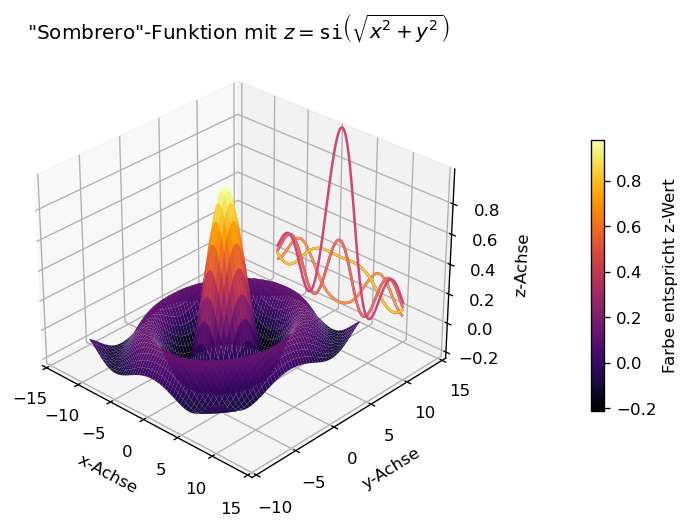

In [43]:
fig = plt.figure(figsize=(9, 5), dpi=120)
ax = fig.add_subplot(projection="3d")

num_steps = 10000
x = np.linspace(start=(-3*np.pi), stop=(3*np.pi), num=num_steps)
y = np.linspace(start=(-3*np.pi), stop=(3*np.pi), num=num_steps)
XM, YM = np.meshgrid(x, y)
R = np.sqrt(XM**2 + YM**2)
ZM = np.sin(R) / R

surf = ax.plot_surface(X=XM, Y=YM, Z=ZM, antialiased=True, cmap="inferno")
cset = ax.contour(X=XM, Y=YM, Z=ZM, zdir="y", offset=15.5, extend3d=False, cmap="plasma")

fig.colorbar(surf, shrink=0.6, pad=0.15, label="Farbe entspricht z-Wert")
ax.set_xlabel("x-Achse")
ax.set_ylabel("y-Achse")
ax.set_zlabel("z-Achse")
ax.set_title(""""Sombrero"-Funktion mit """ + r"$z=\mathtt{si}\left(\sqrt{x^2 + y^2}\right)$", fontsize=12)
ax.set_xlim(-15, 15)
ax.set_ylim(-10, 15)
ax.view_init(azim=-47)

plt.show();

## Einfach, einfacher, `plt.plot()`

Der wohl simpelste Einsatz von `matplotlib` liegt in der Nutzung der Funktion `plt.plot()`. Dazu gibt man einfach ein 1-dimensionales Array als erstes Argument an die Funktion und erhält ein Liniendiagramm, wobei die x-Achse mit den Indizes des Arrays und die y-Achse mit den Werten des Arrays beschriftet wird.

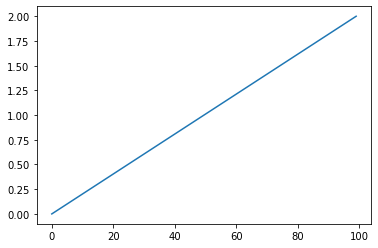

In [44]:
x = np.linspace(0, 2, 100)
plt.plot(x)

Ein `;` nach dem Befehl `plt.plot()`, bzw. nach dem letzten `matplotlib` Befehl, vermeidet die Textausgabe über der Grafik.

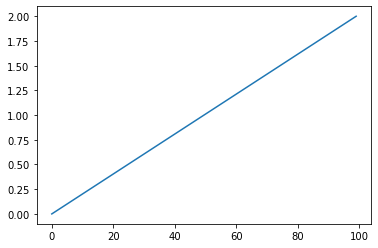

In [45]:
x = np.linspace(0, 2, 100)
plt.plot(x);

Es lassen sich natürlich auch komplexere Daten wiedergeben, wie beispielsweise der Verlauf der $e$-Funktion von $e^0$ bis $e^{10}$ mit Hilfe von `np.logspace()`.

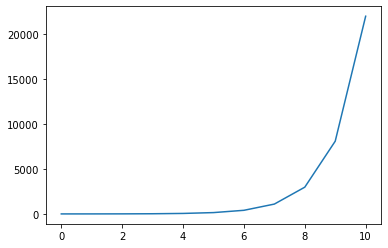

In [46]:
x = np.logspace(0, 10, 11, base=np.e)
plt.plot(x);

## Anpassen der Grafik

Aktuell ist die Grafik noch etwas nackt und wenig aussagekräftig. Das wollen wir nun ändern. Konkret werden wir Größe, Titel, Achsenbeschriftung und Strichfarbe der Reihe nach anpassen.

### Die Grafik als Objekt

Wollen wir grundlegende Eigenschaften wie die Größe der Grafik ändern, müssen wir dazu ein `Figure` Objekt erzeugen. Dazu verwenden wir die Funktion `plt.figure()`, dessen Rückgabe eben jenes Objekt ist.

In [47]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Wollen wir nun die Größe der Grafik ändern haben wir zwei Möglichkeiten: Entweder wir legen direkt bei der Erzeugung die Größe fest. Dazu übergeben wir der `plt.figure()` Funktion das Argument `figsize=(8, 4)` wobei der erste Wert für die Breite des Objekts und der zweite für die Höhe des Objekts in Zoll steht. Ein Zoll hat 72 Pixel.

In [48]:
fig = plt.figure(figsize=(8, 4))

<Figure size 576x288 with 0 Axes>

Wollen wir nach der Erzeugung des Objekts dessen Größe ändern verwenden wir die Methode `fig.set_size_inches()`, der wir als erstes und zweites Argument die Breit und Höhe der Grafik in Zoll übergeben.

In [49]:
fig = plt.figure()
fig.set_size_inches(8, 4)

<Figure size 576x288 with 0 Axes>

Wir verwenden jetzt den ersten Ansatz um unsere Grafik von oben zu vergrößern. Dazu brauchen wir lediglich die Zeile

`fig = plt.figure(figsize=(8, 4))`

über den `plt.plot()` Befehl einzufügen.

*Hinweis: Mit dem Argument `dpi=120` erhöhen wir zusätzlich die DPI Zahl von 72 auf 120.*

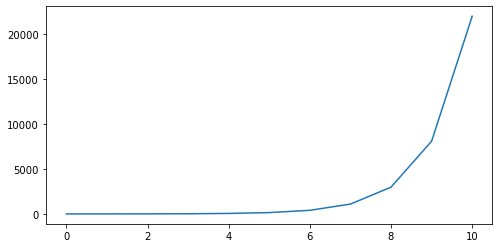

In [50]:
x = np.logspace(0, 10, 11, base=np.e)
fig = plt.figure(figsize=(8, 4))
plt.plot(x);

### Titel der Grafik

Aktuell ist die Grafik doch wenig aussagekräftig, insbesondere ein aussagekräftiger Titel fehlt. Mit `plt.title()` verschaffen wir uns Abhilfe. Dazu übergibt man als Argument einfach den String mit dem Titel.

*Für Interessierte: `matplotlib` erlaubt auch die Verwendung von LaTeX Befehlen zur Beschriftung.*

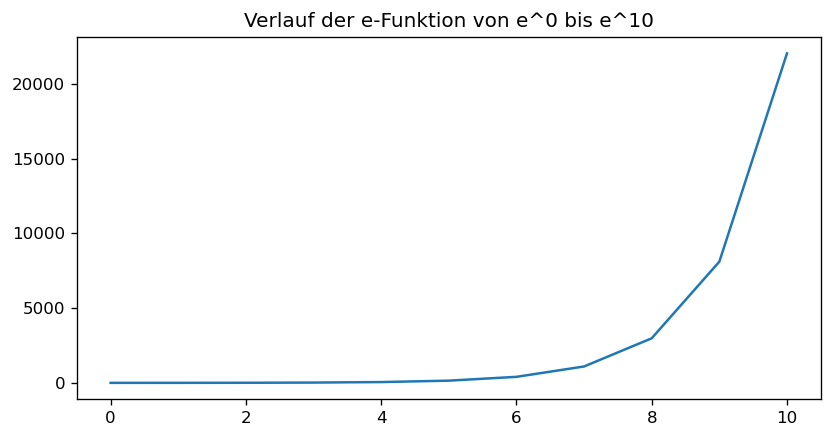

In [51]:
x = np.logspace(0, 10, 11, base=np.e)
fig = plt.figure(figsize=(8, 4), dpi=120)
plt.plot(x)
plt.title("Verlauf der e-Funktion von e^0 bis e^10");

### Achsenbeschriftung

Jetzt haben wir einen Titel, allerdings müssten Dritte raten, was die einzelnen Achsen repräsentieren. Mit `plt.xlabel()` und `plt.ylabel()` können wir die Beschriftung für die x-Achse und y-Achse vorgeben. Diese wird unter der x-Achse und links neben der y-Achse aufgetragen.

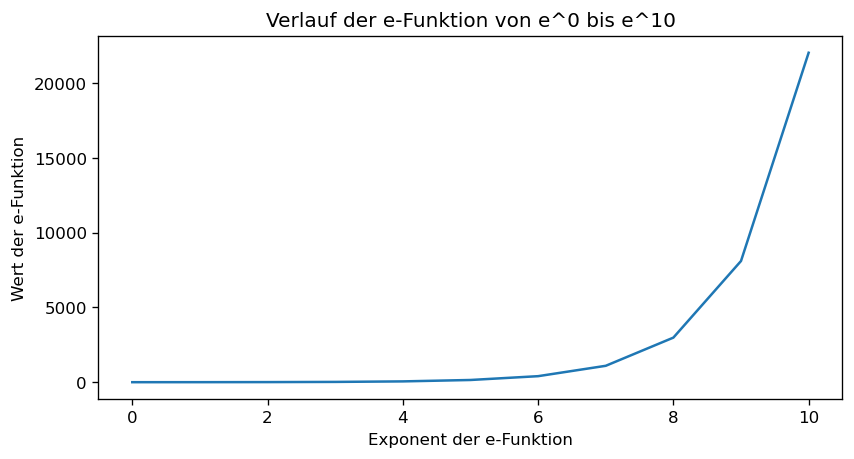

In [52]:
x = np.logspace(0,10, 11, base=np.e)
fig = plt.figure(figsize=(8, 4), dpi=120)
plt.plot(x)
plt.title("Verlauf der e-Funktion von e^0 bis e^10")
plt.xlabel("Exponent der e-Funktion")
plt.ylabel("Wert der e-Funktion");

### Strichfarbe

Mit Titel und Achsenbeschriftung ist die Grafik nun doch etwas einfacher verstehen. Wollen wir jetzt noch die Farbe des Striches verändern müssen wir der Funktion `plt.plot()` zusätzlich zu den Daten noch die Farbe des Striches über den Parameter `color` übergeben. In diesem Fall nehmen wir Rot.

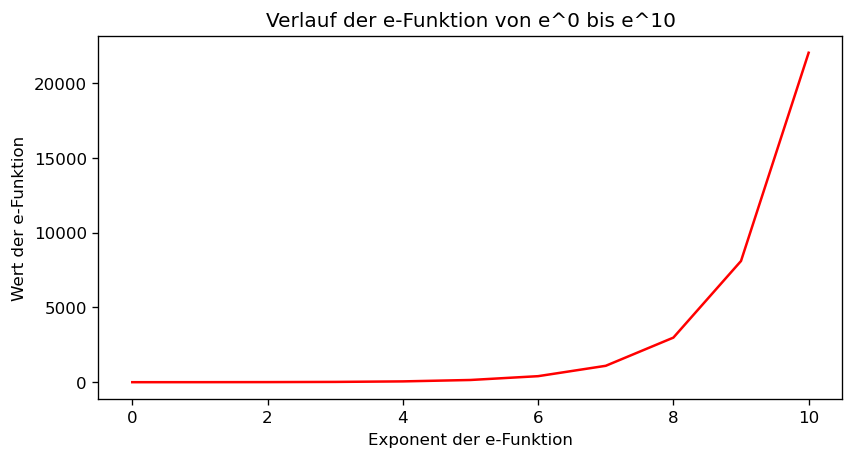

In [53]:
x = np.logspace(0,10, 11, base=np.e)
fig = plt.figure(figsize=(8, 4), dpi=120)
plt.plot(x, color="red")
plt.title("Verlauf der e-Funktion von e^0 bis e^10")
plt.xlabel("Exponent der e-Funktion")
plt.ylabel("Wert der e-Funktion");

## 2D Daten

Wir schauen uns jetzt die Visualisierung von 2D Daten an. Das Funkionsprinzip ist das gleiche wie bei 1D Daten, erlaubt uns aber weitere Diagrammtypen zu nutzen.

### 2D Liniendiagramme

Schauen wir uns zunächst nochmal unser initiales Beispiel an: die Entwicklung der $e$-Funktion von $e^0$ bis $e^{10}$.

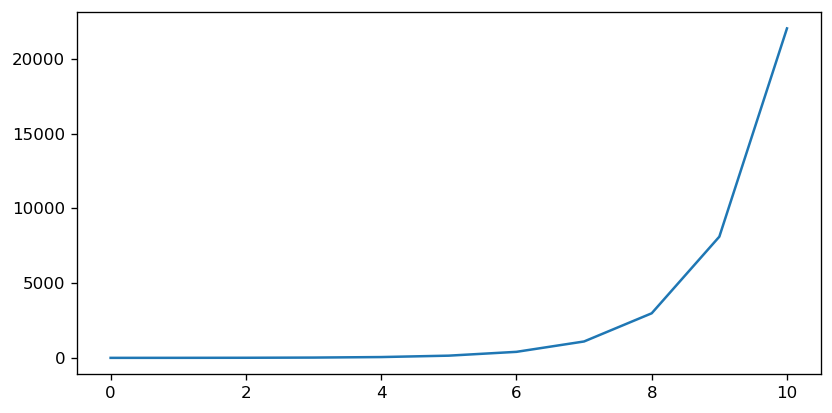

In [54]:
fig = plt.figure(figsize=(8, 4), dpi=120)
plt.plot(np.logspace(0, 10, 11, base=np.e));

Bisher ist der Kurvenverlauf ziemlich kanting. Der Grund ist klar: Wir nutzen 11 Werte für die 11 Potenzen von 0 bis 10. Um die Kurve zu glätten brauchen wir mehr Zwischenwerte auf der x-Achse. In dem wir jetzt der `plt.plot()` Funktion zwei Argumente mitgeben, nämlich x- **und** y-Werte, können wir den Abstand zwischen zwei Punkten bestimmen. Wir erstellen jetzt zwei Arrays, eins im Intervall $[0, 10]$ mit 100 Werten für die x-Achse und eins im Intervall $[e^0, e^{10}]$ mit 100 Werten für die y-Achse.

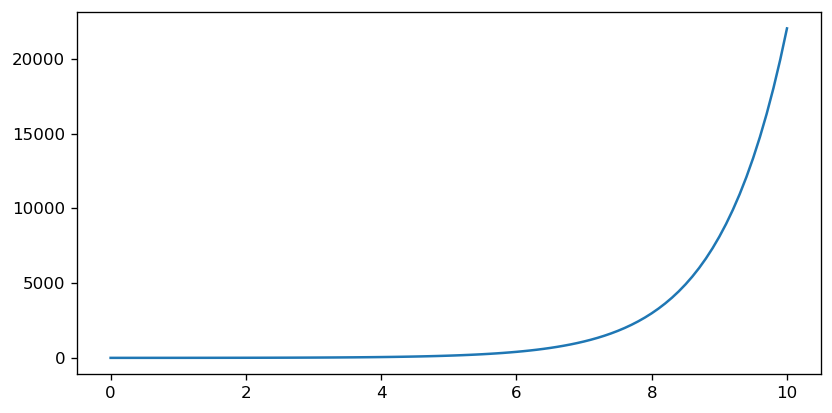

In [55]:
x_arr = np.linspace(0, 10, 101)
y_arr = np.logspace(0, 10, 101, base=np.e)

fig = plt.figure(figsize=(8, 4), dpi=120)
plt.plot(x_arr, y_arr);

Wie wir sehen ist die Kurve nun deutlich glatter obwohl unsere Achsenbeschriftung immer noch die selbe ist.

### 2D Streudiagramme

Wir können aber natürlich auch Daten verwenden, bei denen die zwei Achsen nicht voneinader abhängen. Wir visualisieren dies am Beispiel von vier Punkten in der komplexen Ebene mit den Koordinaten  

$$\mathsf{b}=\begin{pmatrix}
1+1j \\
1-1j \\
-1+1j \\
-1-1j
\end{pmatrix}$$

In [56]:
x = np.array([[1+1j],
              [1-1j],
              [-1+1j],
              [-1-1j]])

Über die Funktion `plt.scatter()` können wir ein Streudiagramm erzeugen. Erstes Argument sind wieder die Werte für die x-Achse, zweistes für die y-Achse.

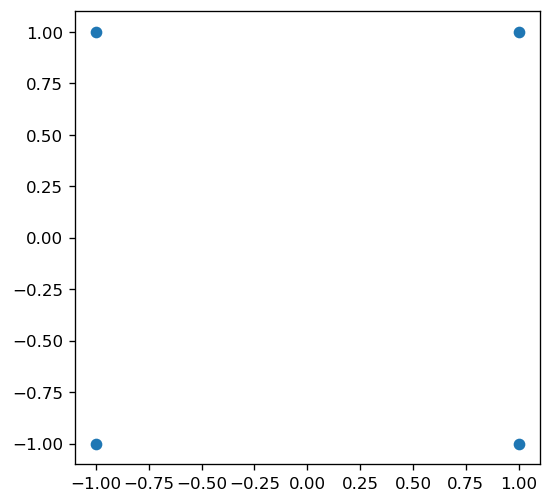

In [57]:
fig = plt.figure(figsize=(5, 5), dpi=120)
plt.scatter(x.real, x.imag);

Wir können deutlich die vier Punkte erkennen, er wäre aber natürlich wünschenswert das Koordinatensystem in der Mitte zu haben um sich besser orientieren zu können. Die Funktionen `plt.axhline()` und `plt.axvline()` werden das für uns erledigen, wir übergeben dazu einfach die y- bzw. x-Achsen Werte an deren Stelle wir eine grade Linie einfügen möchten.

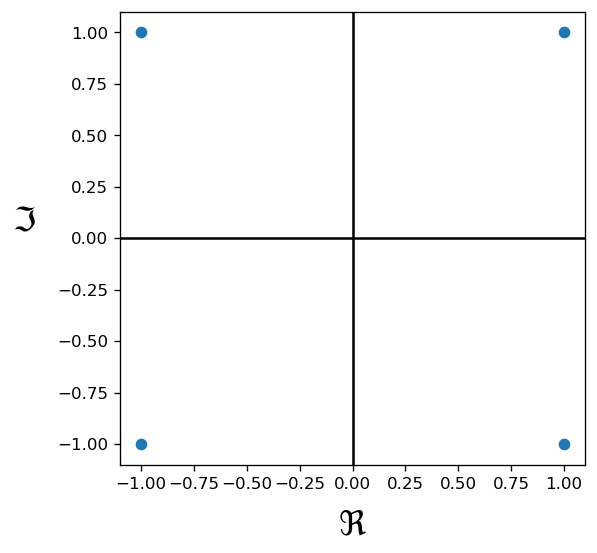

In [58]:
fig = plt.figure(figsize=(5, 5), dpi=120)
plt.axhline(0, color="black") # Horizontale Linie durch y = 0
plt.axvline(0, color="black") # Vertikale Linie durch x = 0
plt.xlabel(r"$\Re$", fontsize=20, labelpad=10)
plt.ylabel(r"$\Im$", fontsize=20, rotation=0, labelpad=20)
plt.scatter(x.real, x.imag);

Mit dem Wissen über `numpy` und `matplotlib` wollen wir uns nun unserem letzten wichtigen Modul, `scipy`, zuwenden.

# SciPy

Während NumPy die grundsätzlichen Datenstrukturen und auch einige mathematische Funktionen zur Verfügung stellt, ist SciPy das Paket mit der größten Bandbreite an mathematischen Werkzeugen. SciPy bietet eine hervorragende Integration von NumPy, sodass SciPy Funktionen direkt auf NumPy Objekte angewendet werden können. Auf Grund der Vielfalt werden wir uns auf die SciPy Unterpakete `fft` und `signal` beschränken.

**Wichtig:** Im Gegensatz zu NumPy müssen die Unterpakete explizit importiert werden, wie auch hier drunter geschehen.

In [59]:
import scipy.fft
import scipy.signal

## Grundbegriffe zur digitalen Signalverarbeitung

Bevor wir mit dem eigentlichen Programmieren anfangen, müssen wir zunächst einige wichtige Begriffe einführen und genau definieren.

> Signal $x[t]$: Zeitabhängige Folge von Messpunkten, welche in Form von numerischen Werten vorliegt. Im Bereich der digitalen Signalverarbeitung immer zeitdiskret.

> Amplitude $u$: Betrag des Messwerts eines Signals zu einem bestimmten Zeitpunkt, üblicherweise in Volt angegeben.  

> Frequenz $f$: Anzahl der (Sinus-)Schwingungen in einem Zeitintervall, üblicherweise in Hertz angegeben ($f = \Large\frac{\omega}{2\pi}$).  

> Abtastrate $f_s$: Frequenz, mit welcher die Amplitude eines Signals erfasst (abgetastet) wird. Muss mindestens doppelt so hoch sein wie die maximale Frequenz ($f_s > 2 \cdot f_{max}$).  

> Grenzfrequenz $f_g$: Frequenz, ab der die Amplitude um $\small\mathrm{3 \space dB}$ pro Dekade sinkt.

## Signalerzeugung

Zunächst brauchen wir ein Signal, dessen Eigenschaften wir analysieren wollen. Wir erstellen dazu eine Funktion, um so später schneller neue Beispiele generieren zu können.

In [60]:
def create_signal(n_points=1000, n_freqs=5, noise=False):
    '''
        
    Creates a signal of given length and frequencies. May also include gaussian
    noise.
    
    Parameters
    ----------
    n_points: int
              Number of points the signal contains. Must be a positive integer.
              Default is 1000.
    n_freqs:  int or list
              Can either be an integer or a list. If it is an integer, the
              corresponding number of random frquenices will be created.
              If it is a list, the elements of the list will be used as
              the frequencies. Default is the integer 5.
    noise:    bool
              Whether to add gausian noise to the signal. Default is False.
              
    '''
    
    if type(n_freqs) == type(5):
        freqs = sorted(np.random.randint(low=1, high=min(n_points//2, 1025), size=n_freqs))
    elif type(n_freqs) == type([1, 2]):
        freqs = sorted(n_freqs)
    
    time = np.linspace(0.0, 1.0, n_points, dtype=np.double)
    x = np.zeros(shape=n_points, dtype=np.double)
    
    for i in freqs:
        x += np.sin(2*np.pi*i*time, dtype=np.double)
    if noise:
        x += (0.5 * np.random.randn(n_points))
    
    return freqs, x

Und erstellen direkt ein Signal mit 3 Frequenzen und einer Abtastrate von 4096 Hz.

In [61]:
freqs, signal = create_signal(n_points=4096, n_freqs=[231, 347, 796], noise=False)

Schauen wir uns zunächst erstmal das erzeugte Signal an.

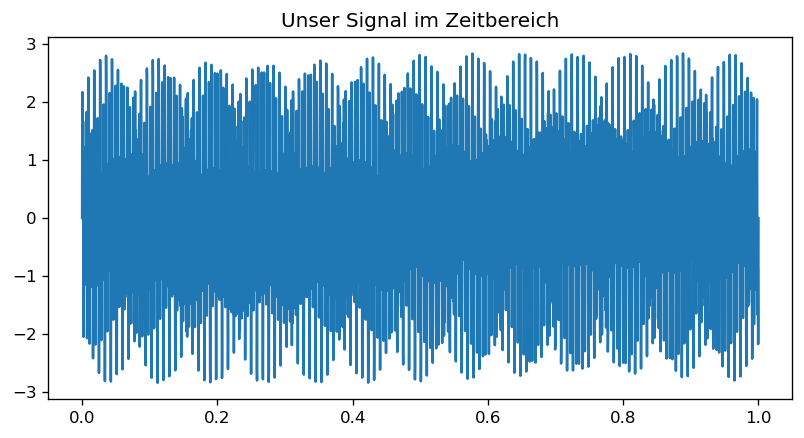

In [62]:
fig = plt.figure(figsize=(8, 4), dpi=120)
plt.plot(np.linspace(0.0, 1.0, 4096), signal)
plt.title("Unser Signal im Zeitbereich");

Der periodische Charakter des Signals ist gut zu erkennen. Die Frequenzen können wir uns kurz anzeigen lassen, sollten diese aber natürlich gleich via FFT bestimmen können.

In [63]:
freqs

[231, 347, 796]

## FFT - Fast Fourier Transform

Zunächst wollen wir uns mit dem Paket `fft` beschäfitgen. Wie der Name schon erahnen lässt enthält es Funktionen für die Schnelle Fourier Transformation. Grundsätzlich lässt sich mit der `scipy.fft.fft()` Funktion die Fourier Transformation eines beliebigen Arrays bestimmen, mit `scipy.fft.rfft()` haben wir aber den zusätzlichen Komfort, dass die negativen Frequenzen ($f < 0$) direkt entfernt werden.

In [64]:
transformed = scipy.fft.rfft(signal)

Das Ergebnis ist ein Array mit komplexen Zahlen, dessen Indizes für die Frequenzen stehen und der Wert am jeweiligen Index für die Stärke der Frequenz. Am Punkt `transformed[16]` erhalten wir also die Stärke der 16 Hz Frequenz.

In [65]:
np.absolute(transformed[16])

0.13149448139549402

Wir nutzen die `np.absolute()` Funktion um den Betrag der komplexen Zahl am jeweiligen Index zu erhalten.

*Erinnerung: Betrag einer komplexen Zahl = $\sqrt{\mathfrak{R}^2 + \mathfrak{I}^2}$*

Wir können uns natürlich den Verlauf der Frequenzkurve auch graphisch anschauen. Wir nutzen dazu die `plt.stem()` Funktion.

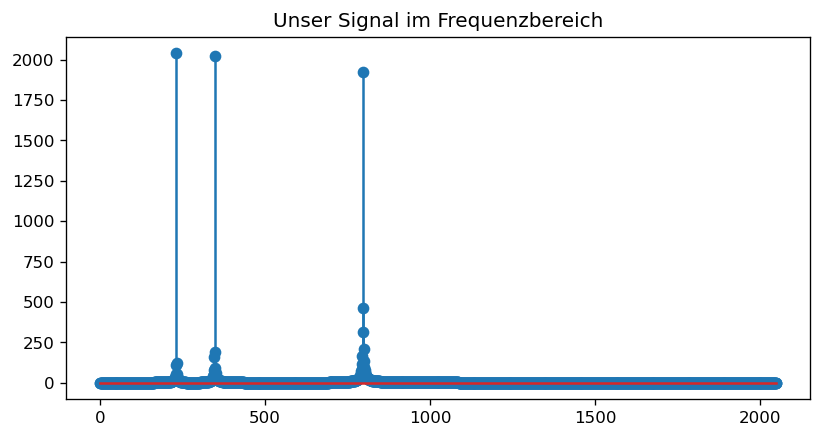

In [66]:
fig = plt.figure(figsize=(8, 4), dpi=120)
plt.stem(np.absolute(transformed))
plt.title("Unser Signal im Frequenzbereich");

Auf Grund der graphischen Darstellung würden wir die Frequenzen bei $\approx$ 250, 350 und 750 Hz vermuten.

Wollen wir jetzt auch numerisch die Frequenzen bestimmen müssen wir die Indizes der höchsten Werte finden. Dazu bietet sich die `np.argsort()` Funktion, eingepackt in die `np.flip()` Funktion. Wir erhalten dann die nach Werten absteigenden Indizes des Arrays zurück.

In [67]:
sorted_freqs = np.flip(np.argsort(np.absolute(transformed)[:2048]))

Schauen wir uns die ersten 10 Einträge an, werden wir unsere Vermutung zu den Frequenzen bestätigt sehen.

In [68]:
sorted_freqs[:10]

array([231, 347, 796, 797, 795, 798, 348, 794, 346, 799], dtype=int64)

Zum Schluss schauen wir uns noch die Frequenzen zusammen mit ihrer Amplitude an.

In [69]:
for i in range(10):
    print(str(sorted_freqs[i]) + " Hz:    " + str(np.absolute(transformed[sorted_freqs[i]])))

231 Hz:    2038.4936078607202
347 Hz:    2022.914668653798
796 Hz:    1921.861505525148
797 Hz:    465.2052650918054
795 Hz:    311.77256083109495
798 Hz:    208.2243574425405
348 Hz:    188.34784881432546
794 Hz:    169.1459613155742
346 Hz:    157.11006544418225
799 Hz:    134.4327632097427


Hier können wir ziemlich deutlich erkennen, dass die Frequenzen 231, 347 und 796 Hz die höchste Amplitude haben. Wir sehen aber auch, dass um die Frequenz 796 Hz herum weitere signifikante Frequenzen entstanden sind. Dies lässt sich vorallem durch numerische Fehler erklären, welche bei der Berechnung der Amplitude im Zeitbereich entstehen.

## Digitale Signalverarbeitung

Das Paket `scipy.signal` enthält eine Vielzahl von Werkzeugen für die Signalverarbeitung. Wir werden uns auf die für uns relevanten Teile Faltung und Filter beschränken.

### Filterdesign

Hat man Rauschen im Signal oder möchte man Matched Filter einsetzen, muss man dafür ein entsprechendes Filter erstellen. Dieses faltet man dann im Zeitbereich mit dem Signal und entfernt so Störungen bzw. erhält dann im Fall von Matched Filter überhaupt das ursprüngliche Signal. Mit der Funktion `scipy.signal.firwin()` können wir so ein Filter erstellen. Wir beginnen mit einem Beispiel für einen Tiefpassfilter, anhand welchem wir die prinzipielle Vorgehensweise erklären.

In [70]:
lowpass = scipy.signal.firwin(numtaps=11, cutoff=350, width=None, window="hamming", pass_zero="lowpass", scale=True, fs=4096)

Die Funktion nimmt einiges an Argumenten. Die wichtigsten sind `numtaps`, `cutoff`, `pass_zero`, und `fs`.

> `numtaps` gibt die Anzahl der Glieder der Funktion an, welche das Filter haben soll. Im oberen Beispiel wären es dann eine Funktion mit 11 Gliedern.

> `cutoff` gibt die Grenzfrequenz in Hz an, ab der die Amplitude aller weiteren Frequenzen gesenkt werden soll.

> `pass_zero` bestimmt, ob wir ein Tiefpass-, Hochpass-, Bandpass- oder Bandstopfilter erstellen möchten.

> `fs` gibt die Abtastrate in Hz an.

Möchten wir einen Tiefpass mit 21 Gliedern, einer Grenzfrequenz von 20 Hz und einer Abtastrate von 100 Hz erstellen, sieht unsere Funktion dann so aus.

In [71]:
lowpass = scipy.signal.firwin(numtaps=21, cutoff=20, pass_zero="lowpass", fs=100)

Im Zeitbereich sieht dieser Tiefpass dann so aus.

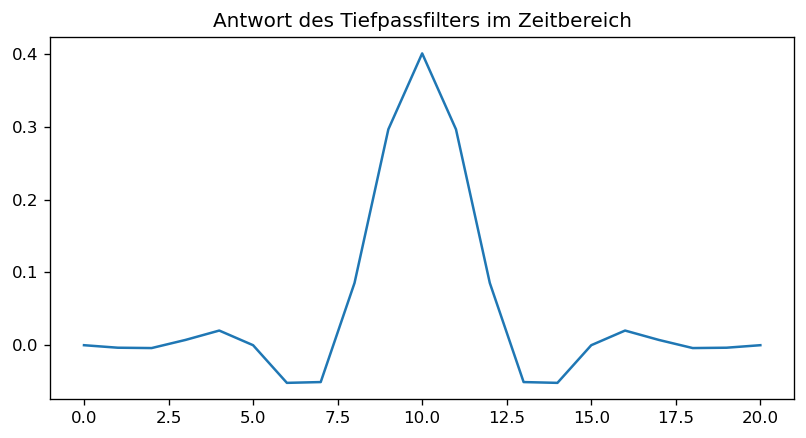

In [72]:
fig = plt.figure(figsize=(8, 4), dpi=120)
plt.plot(lowpass)
plt.title("Antwort des Tiefpassfilters im Zeitbereich");

Und im Frequenzbereich dann so.

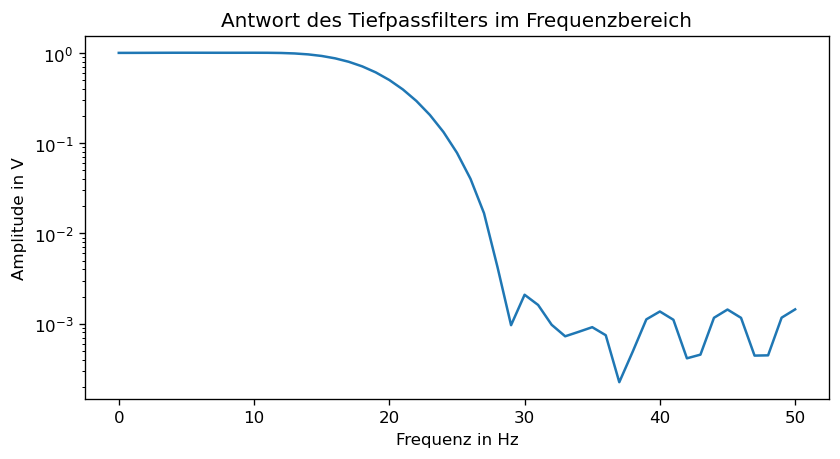

In [73]:
lowpass_transformed = scipy.fft.rfft(lowpass, 100)
fig = plt.figure(figsize=(8, 4), dpi=120)
plt.semilogy(np.absolute(lowpass_transformed))
plt.ylabel("Amplitude in V")
plt.xlabel("Frequenz in Hz")
plt.title("Antwort des Tiefpassfilters im Frequenzbereich");

### Fensterfunktion

Eine weitere wichtige Komponente der `scipy.signal.firwin()` Funktion ist das `window` Argument. Mit diesem können wir die Fensterfunktion des Filters festlegen, welche die Form/Gestalt des Filters festlegt. Dazu schauen wir uns einfach zwei unterschiedliche Fensterfunktionen an, nämlich das Hamming Fenster und das Gauß-Fenster. Eine Fensterfunktion lässt sich allgemein mit der Funktion `scipy.signal.get_window()` erzeugen, wir gehen bei den beiden Fenstern genauer auf die Funktion ein.

#### Hamming Fenster

Das Hamming-Fenster ist durch die Funktion $$\mathrm{w(n)} = 0.54 - 0.46 \cdot \cos{\left(\frac{2\pi n}{N-1}\right)}$$ für $\mathrm{n=0,\dotsc, N-1}$ gegeben, wobei $N$ die Fensterbreite und $n$ der Laufindex sind. Übergeben wir der `scipy.signal.get_window()` als ersten Parameter das Wort "hamming" erhalten wir ein Hamming-Fenster. Der zweite Parameter gibt dann die Breite des Fensters an, quasi die Anzahl der Punkte welche das Fenster überdeckt.

In [74]:
hamming = scipy.signal.get_window("hamming", 51)

Graphisch sieht das Hamming-Fenster dann so aus.

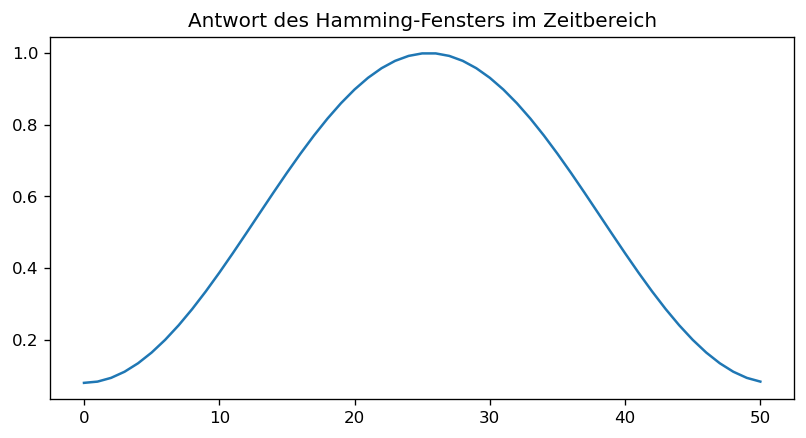

In [75]:
fig = plt.figure(figsize=(8, 4), dpi=120)
plt.plot(hamming)
plt.title("Antwort des Hamming-Fensters im Zeitbereich");

Und im Frequenzbereich sieht das Hamming-Fenster dann so aus.

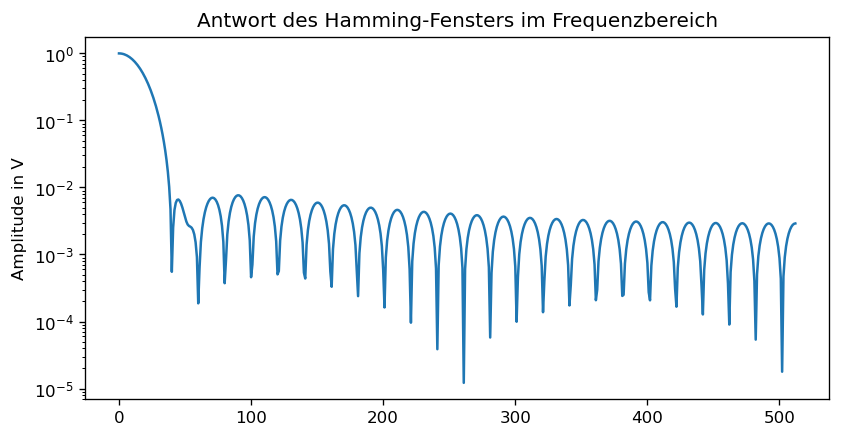

In [76]:
hamming_transformed = scipy.fft.rfft(hamming, 1024) / (len(hamming)/2.0)
hamming_response = np.abs(hamming_transformed / np.max(np.abs(hamming_transformed)))

fig = plt.figure(figsize=(8, 4), dpi=120)
plt.semilogy(hamming_response)
plt.ylabel("Amplitude in V")
plt.title("Antwort des Hamming-Fensters im Frequenzbereich");

#### Gauß-Fenster

Das Gauß-Fenster ist durch die Funktion $$\mathrm{w(n)} = \large e^{\Large-\frac{1}{2}(\frac{n}{\sigma})^2}$$

gegeben, wobei $n$ wieder der Laufindex und $\sigma$ die Standardabweichung sind. In der Tat ist das Gauß-Fenster die Verwendung der bekannten Gauß-Funktion als Fensterfunktion. Diesmal müssen wir dem Funktionsaufruf als erstes Argument eine Tupel übergeben, bestehend aus dem Wort "gaussian" für die Gauß-Funktion und der gewünschten Normalverteilung. Das zweite Argument ist dann wieder die Breite des Fensters.

In [77]:
gauss = scipy.signal.get_window(("gaussian", 7.0), 51)

Im Zeitbereich sieht das Gauß-Fenster dann so aus.

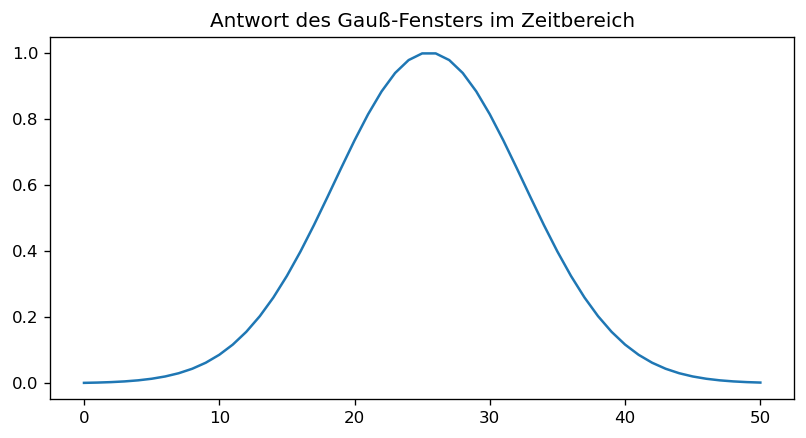

In [78]:
fig = plt.figure(figsize=(8, 4), dpi=120)
plt.plot(gauss)
plt.title("Antwort des Gauß-Fensters im Zeitbereich");

Und im Frequenzbereich sieht das Gauß-Fenster dann so aus.

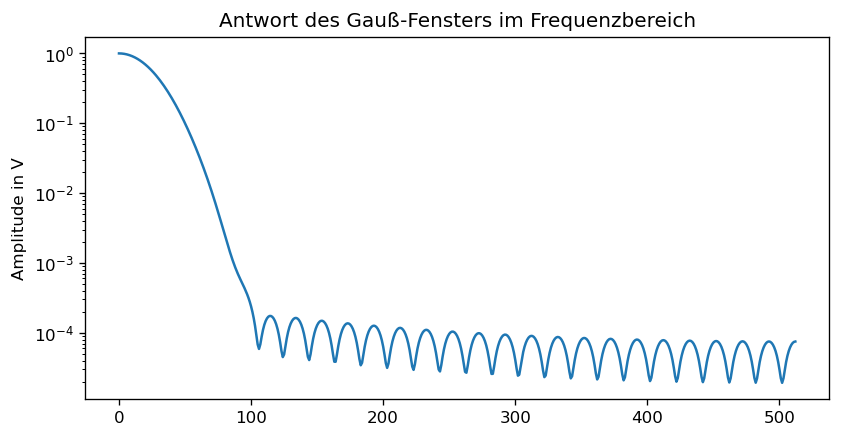

In [79]:
gauss_transformed = scipy.fft.rfft(gauss, 1024) / (len(gauss)/2.0)
gauss_response = np.abs(gauss_transformed / np.max(np.abs(gauss_transformed)))

fig = plt.figure(figsize=(8, 4), dpi=120)
plt.semilogy(gauss_response)
plt.ylabel("Amplitude in V")
plt.title("Antwort des Gauß-Fensters im Frequenzbereich");

Zum Vergleich betrachten wir beide Fenster nochmal nebeneinander.

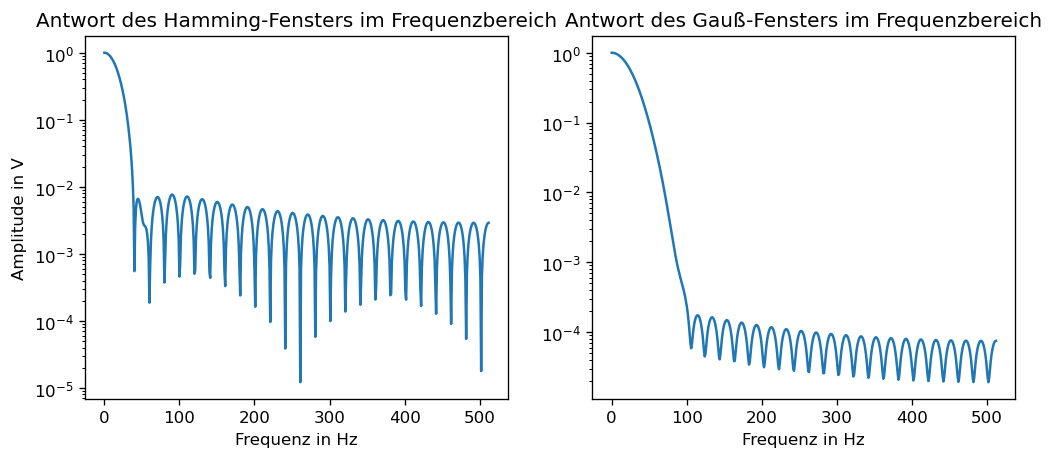

In [80]:
fig = plt.figure(figsize=(10, 4), dpi=120)
ax1 = plt.subplot(121)
ax1.semilogy(hamming_response)
ax1.set_ylabel("Amplitude in V")
ax1.set_xlabel("Frequenz in Hz")
ax1.set_title("Antwort des Hamming-Fensters im Frequenzbereich");

ax2 = plt.subplot(122)
ax2.semilogy(gauss_response)
ax2.set_xlabel("Frequenz in Hz")
ax2.set_title("Antwort des Gauß-Fensters im Frequenzbereich");

Wie wir sehen sind die Antworten der beiden Fenster gut zu unterscheiden. Das Hamming-Fenster hat einen schnelleren Dämpfung der Amplitude im Frequenzbereich, das Gauß-Fenster erreicht dafür insgesamt eine stärkere Dämpfung. Im letzten Teil schauen wir uns noch an wie wir die Faltungsoperation durchführen um ein Signal zu filtern.

### Faltung

Da wir uns im Bereich der digitalen Signalverarbeitung befinden arbeiten wir nicht mit Integralen, sondern mit Summen. Selbiges gilt auch für die Faltung, welche in diesem Falle eine Summe ist, nämlich über die Produkte von Signal und Filter. Mathematisch lässt sich das so formulieren:

$$\large\left(f\ast g\right)(n) = \large\displaystyle\sum_{k=\frac{G}{2}}^{-\frac{G}{2}} f(n)\cdot g(n-k)$$

wobei $n$ wieder der Laufindex unseres Singals, $k$ der Laufindex des Filters und $G$ die Filterbreite ist. Alternativ lässt sich die auch Faltung über das Faltungstheorem formulieren[<sup id="fn1-back">[1]</sup>](#fn1):

$$ \large\left(f\ast g\right)(n) = \large \mathcal{F} \left (f(n) \right)\cdot\mathcal{F}\left(g(n)\right) $$

Als Beispiel erstellen wir ein Signal mit Frequenzen bei 110, 140 und 220 Hz, und einen Filter mit der Grenzfrequenz 140 Hz und Gauß-Fenster.

In [81]:
freq, signal = create_signal(n_points=4096, n_freqs=[110, 140, 220])
filt = scipy.signal.firwin(numtaps=321, cutoff=140, window=("gaussian", 7.0), pass_zero="lowpass", fs=4096)

Schauen wir uns am besten unser Signal vorher graphisch im Zeit- und Frequenzbereich an, um nachher besser beurteilen zu können, ob unser Vorgehen funktioniert hat.

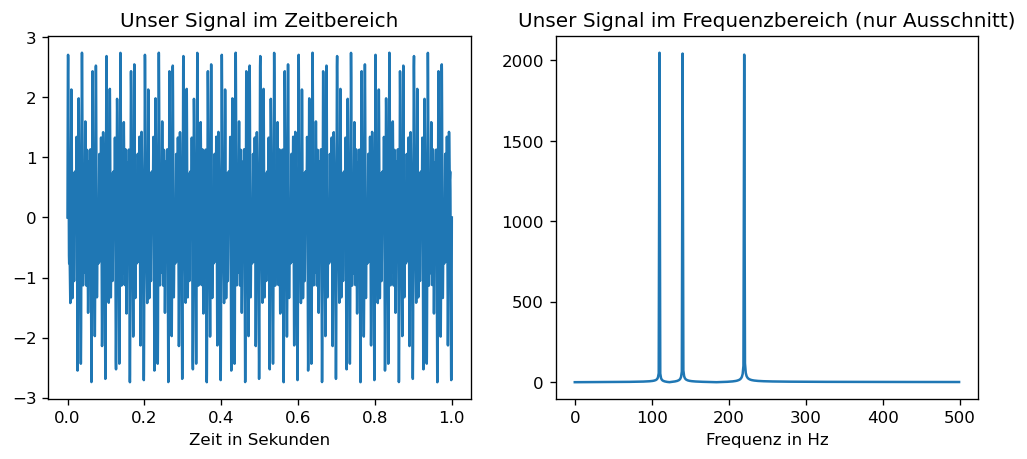

In [82]:
signal_fft = scipy.fft.rfft(signal)

fig = plt.figure(figsize=(10, 4), dpi=120)
ax1 = plt.subplot(121)
ax1.plot(np.linspace(0.0, 1.0, 4096), signal)
ax1.set_xlabel("Zeit in Sekunden")
ax1.set_title("Unser Signal im Zeitbereich");

ax2 = plt.subplot(122)
ax2.plot(np.abs(signal_fft)[:500])
ax2.set_xlabel("Frequenz in Hz")
ax2.set_title("Unser Signal im Frequenzbereich (nur Ausschnitt)");

Wollen wir nun unseren gebauten Filter mit unserem Signal falten, haben wir mehrere Implementierungen der Faltungsoperation zur Auswahl. Diese unterschieden sich vor allem in ihrer Geschwindigkeit in Abhängigkeit von den zu verarbeitenden Daten, das Prinzip ist aber das gleiche.

Schauen wir uns als Beispiel die `scipy.signal.convolve()` Funktion an. Diese ist denkbar einfach in ihrer Anwendung: Wir übergeben als unsere beiden Argumente unser Signal und unseren Filter und et voilà, erhalten unser gefiltertes Signal.

In [83]:
signal_filtered = scipy.signal.convolve(signal, filt)

Wir würden jetzt also erwarten, dass unser Signal im Frequenzbereich ab 140 Hz keine signifikanten Frequenzen mehr aufweist. Schauen wir uns das doch mal an.

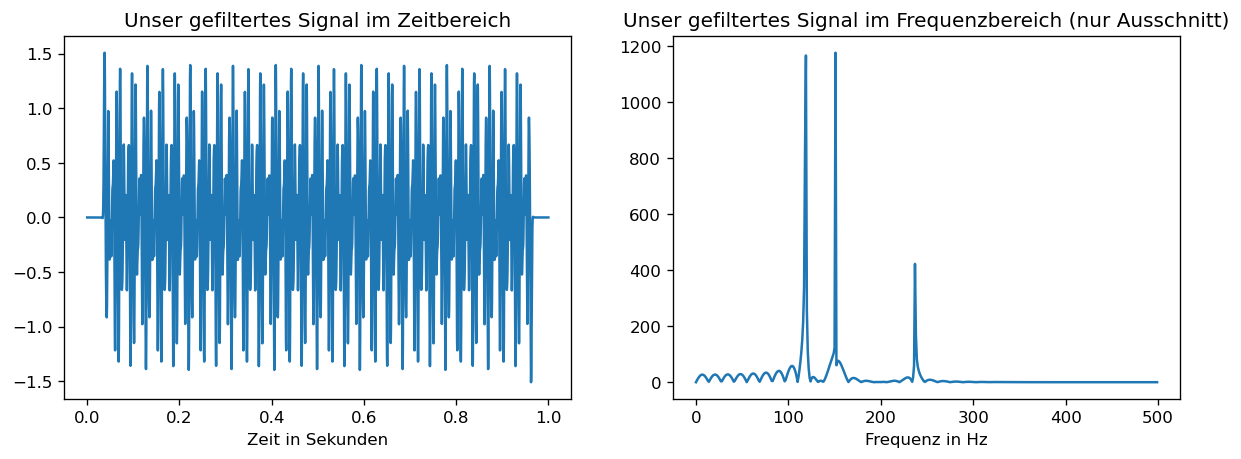

In [84]:
signal_filtered_fft = scipy.fft.rfft(signal_filtered)

fig = plt.figure(figsize=(12, 4), dpi=120)
ax1 = plt.subplot(121)
ax1.plot(np.linspace(0.0, 1.0, 4416), signal_filtered)
ax1.set_xlabel("Zeit in Sekunden")
ax1.set_title("Unser gefiltertes Signal im Zeitbereich");

ax2 = plt.subplot(122)
ax2.plot(np.abs(signal_filtered_fft)[:500])
ax2.set_xlabel("Frequenz in Hz")
ax2.set_title("Unser gefiltertes Signal im Frequenzbereich (nur Ausschnitt)");

Und tatsächlich ist unsere Frequenz bei 220 Hz auf $\large\frac{1}{4}$ ihrer ursprünglichen Amplitude geschrumpft. Ebenfalls sind aber auch unsere Frequenzen bei 110 und 140 Hz in ihrer Amplitude geschrumpft, unser Signal-Rausch-Verhältnis ist aber immernoch ausreichend.

Aber halt, was ist das da im Zeitbereich am Anfang und Ende des Signals? Und warum hat unser Signal im Zeitbereich plötzlich 4416 Punkte statt nur 4096?

Der Grund ist die Funktionsweise der Faltung: da unser Filter sowohl links, als auch rechts vom Mittelpunkt Elemente hat mit denen das Signal gefaltet wird, muss das Signal am Anfang und Ende mit Nullen aufgefüllt werden, da ansonsten keine Werte da sind mit denen gefalten werden kann.

\pagebreak

# Literaturverzeichnis

[<sup id="fn1">[1]</sup>](#fn1-back) Vgl. *Frey, Thomas, Bossert, Martin*: Signal- und Systemtheorie, 2. Aufl., Wiesbaden: Vieweg+Teubner, 2008, S. 184